In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [16]:
# Load your dataset
data = pd.read_csv("cvd_adj.csv")

In [17]:
# Sample 10% of the data
sampled_data = data.sample(frac=0.1, random_state=42)

In [18]:
# Select numerical columns
numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 
                     'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

In [19]:
# Standardize the numerical data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(sampled_data[numerical_columns])

In [21]:
# One-hot encode the categorical data
categorical_columns = sampled_data.select_dtypes(include=['bool']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
categorical_data_encoded = encoder.fit_transform(sampled_data[categorical_columns])

In [22]:
# Combine the standardized numerical data with encoded categorical data
combined_data = np.hstack([numerical_data_scaled, categorical_data_encoded])

In [23]:
# Dictionary to store silhouette scores and cluster labels
results = {}

In [24]:
### K-Means Clustering ###
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(combined_data)
kmeans_silhouette = silhouette_score(combined_data, kmeans_labels)
results['K-Means'] = (kmeans_silhouette, kmeans_labels)

In [25]:
### Gaussian Mixture Model (GMM) ###
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(combined_data)
gmm_silhouette = silhouette_score(combined_data, gmm_labels)
results['GMM'] = (gmm_silhouette, gmm_labels)

In [26]:
### PCA + K-Means ###
pca = PCA(n_components=2)
pca_data = pca.fit_transform(combined_data)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans_pca.fit_predict(pca_data)
pca_silhouette = silhouette_score(pca_data, pca_labels)
results['PCA + K-Means'] = (pca_silhouette, pca_labels)

In [27]:
### t-SNE + K-Means ###
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(combined_data)
kmeans_tsne = KMeans(n_clusters=3, random_state=42)
tsne_labels = kmeans_tsne.fit_predict(tsne_data)
tsne_silhouette = silhouette_score(tsne_data, tsne_labels)
results['t-SNE + K-Means'] = (tsne_silhouette, tsne_labels)

In [28]:
# Find the best-performing method based on silhouette score
best_method = max(results, key=lambda x: results[x][0])
best_silhouette, best_labels = results[best_method]


In [29]:
# Output the best-performing method and its silhouette score
print(f"Best performing method: {best_method} with a silhouette score of {best_silhouette}")


Best performing method: PCA + K-Means with a silhouette score of 0.38360089640778183


In [54]:
print("Best method used for clustering:", best_method)

Best method used for clustering: PCA + K-Means


In [55]:
# Assign the best cluster labels to your dataset for further analysis
sampled_data['Cluster'] = best_labels

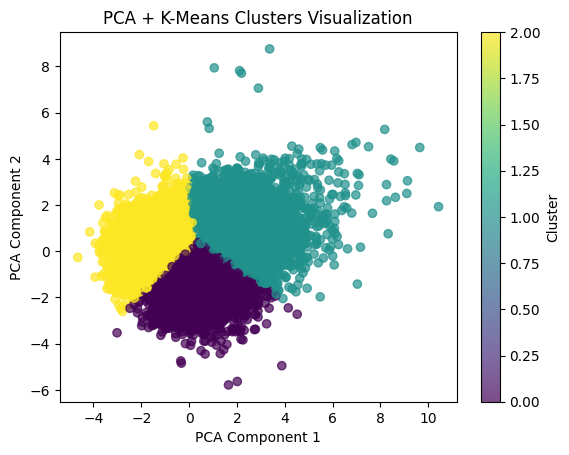

In [56]:
# 1. Visualize the clusters in the 2D PCA space
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=pca_labels, cmap='viridis', alpha=0.7)
plt.title("PCA + K-Means Clusters Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [57]:
# Check the size of each cluster
print("Cluster Sizes:\n", sampled_data['Cluster'].value_counts())

Cluster Sizes:
 Cluster
2    13304
0    11041
1     6540
Name: count, dtype: int64


In [58]:
# Calculate summary statistics for each cluster
cluster_summary = sampled_data.groupby('Cluster').mean()
print("Summary Statistics for Each Cluster:\n", cluster_summary)

Summary Statistics for Each Cluster:
          Height_(cm)  Weight_(kg)        BMI  Alcohol_Consumption  \
Cluster                                                             
0         179.300335    85.937114  26.722205             8.412281   
1         171.892813   110.486292  37.461315             2.172171   
2         162.685884    68.025247  25.753545             3.627029   

         Fruit_Consumption  Green_Vegetables_Consumption  \
Cluster                                                    
0                28.255412                     15.282130   
1                23.086697                     10.757339   
2                34.633794                     17.156569   

         FriedPotato_Consumption  General_Health_Fair  General_Health_Good  \
Cluster                                                                      
0                       8.256951             0.072638             0.257495   
1                       6.632110             0.203364             0.446330   
2  

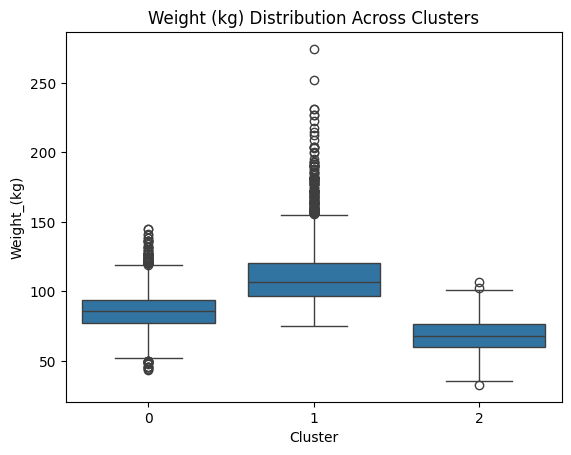

In [59]:
# Visualize the distribution of key features across clusters using boxplots

sns.boxplot(x='Cluster', y='Weight_(kg)', data=sampled_data)
plt.title('Weight (kg) Distribution Across Clusters')
plt.show()